In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [52]:
digits = load_digits()

In [53]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

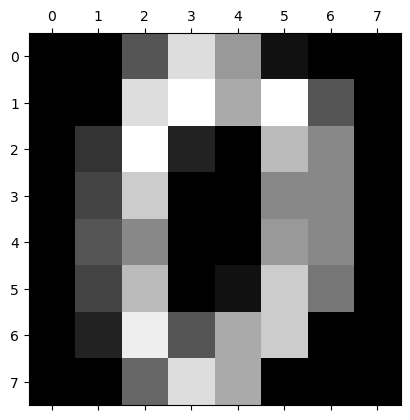

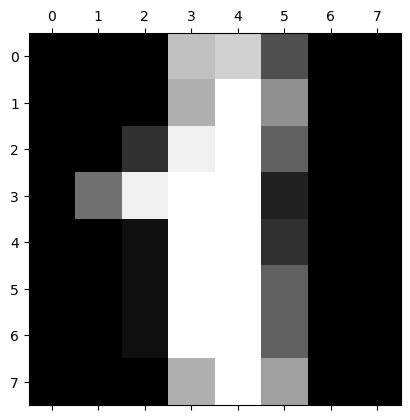

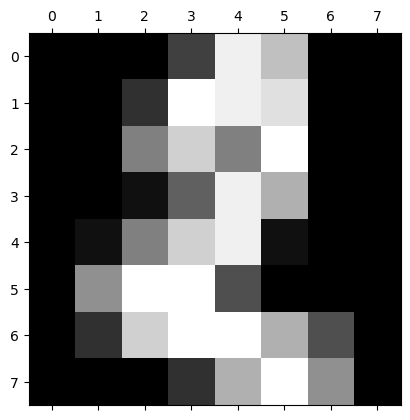

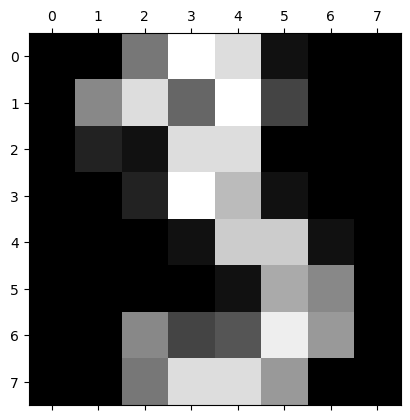

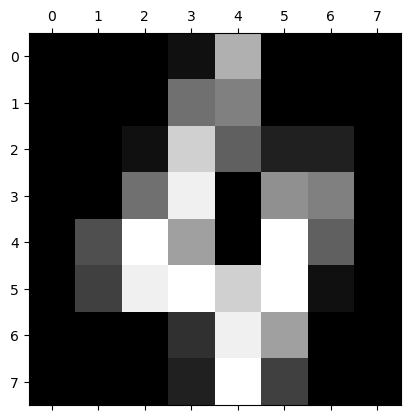

In [55]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [56]:
df = pd.DataFrame(digits.data)

In [57]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [58]:
df['target'] = digits.target

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('target',axis=1),df.target, test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [61]:
model.score(xtest,ytest)

0.975

In [62]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20)

In [63]:
model1.score(xtest,ytest)

0.9666666666666667

In [64]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=30)
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.9638888888888889

In [65]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=90)
model3.fit(xtrain,ytrain)
model3.score(xtest,ytest)

0.9833333333333333

In [66]:
y_predicted=model.predict(xtest)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_predicted)

In [68]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  1,  0],
       [ 0,  3,  0,  2,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 45]], dtype=int64)

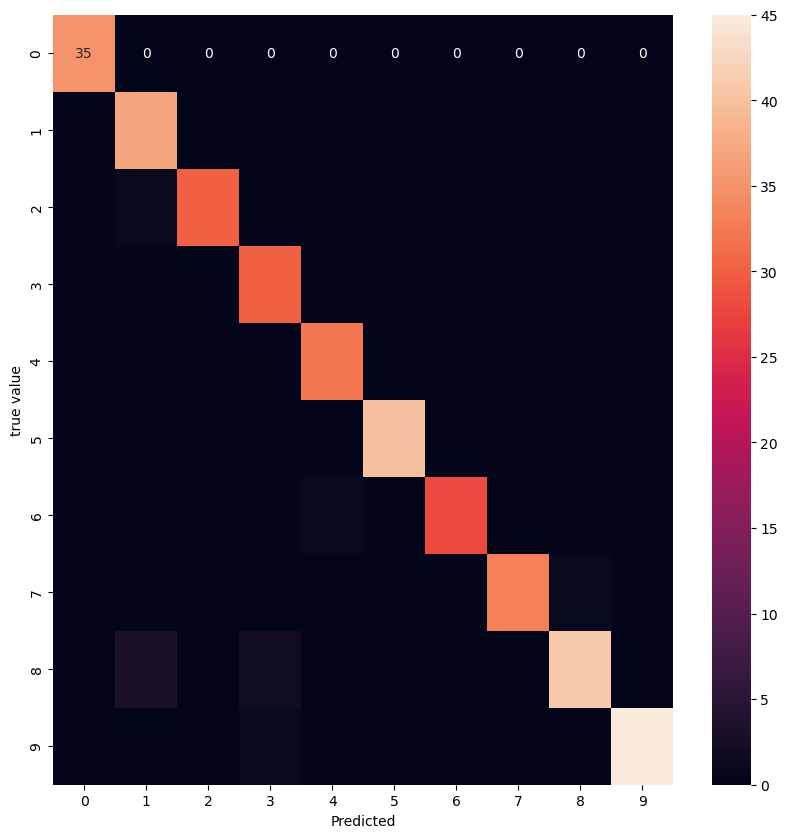

In [78]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('true value')
plt.show()